## Введение

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
games_sales = pd.read_csv("https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_02_visualization/vgchartz-2024.csv").iloc[:, 1:]
games_sales.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


## Задание 1. (Разогревочное)

С помощью типа данных `pandas.TimeStamp` создайте серию из 365 дат - всех дней в 2024 году.  

In [ ]:
pd.Series(pd.date_range(start='2024-01-01', end='2024-12-31', freq='D').tz_localize("Europe/Moscow"))

0     2024-01-01 00:00:00+03:00
1     2024-01-02 00:00:00+03:00
2     2024-01-03 00:00:00+03:00
3     2024-01-04 00:00:00+03:00
4     2024-01-05 00:00:00+03:00
                 ...           
361   2024-12-27 00:00:00+03:00
362   2024-12-28 00:00:00+03:00
363   2024-12-29 00:00:00+03:00
364   2024-12-30 00:00:00+03:00
365   2024-12-31 00:00:00+03:00
Length: 366, dtype: datetime64[ns, Europe/Moscow]

In [ ]:
pd.date_range(start='1-1-2024', periods=8, freq='Y')

DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31', '2030-12-31', '2031-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

Кастомные периоды:

In [ ]:
pd.date_range(start='1-1-2024', periods=5, freq='3M')

DatetimeIndex(['2024-12-31', '2030-12-31', '2036-12-31', '2042-12-31',
               '2048-12-31'],
              dtype='datetime64[ns]', freq='6A-DEC')

Преобразуйте все даты в датасете в тип `pandas.TimeStamp`.

In [ ]:
games_sales['release_date'] = pd.to_datetime(games_sales['release_date'])

## Задание 2.

Сгруппируйте все игры с продажами больше миллиона по году, создайте линейный график относительного роста средних мировых продаж в зависимости от года релиза игры. (Первый год возьмите равным 1, остальные года пересчитайте как отношение к продажам в первый год)

In [ ]:
games_sales.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


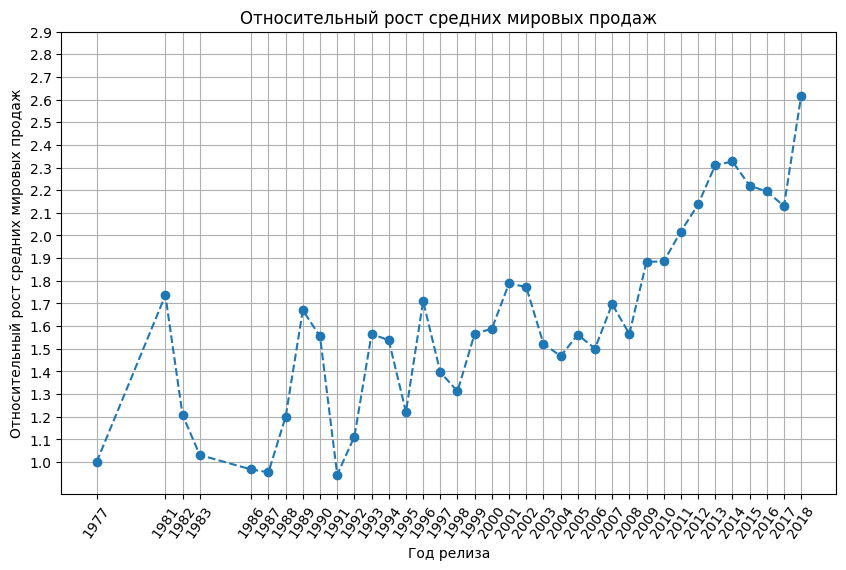

In [ ]:
games_sales['release_year'] = games_sales['release_date'].dt.year

# Группируем по году релиза и вычисляем средние мировые продажи
yearly_sales = games_sales[games_sales['total_sales'] >= 1].groupby('release_year')['total_sales'].mean()

# Вычисляем относительный рост средних мировых продаж
relative_growth = yearly_sales / yearly_sales.iloc[0]

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(relative_growth.index, relative_growth.values, marker='o', linestyle='--')
plt.title('Относительный рост средних мировых продаж')
plt.xlabel('Год релиза')
plt.ylabel('Относительный рост средних мировых продаж')

plt.grid(True)
plt.xticks(relative_growth.index, rotation=55)
plt.yticks(np.arange(start=1, stop=3, step=0.1))
plt.show()

Возможные значения параметра `marker`:
- '.' - точка
- ',' - пиксель
- 'o' - круг
- 'v' - треугольник вниз
- '^' - треугольник вверх
- 's' - квадрат
- 'p' - пентагон
- '+' - плюс
- 'x' - крест

Возможные значения параметра `linestyle`:
- '-' - сплошная линия (по умолчанию)
- '--' - пунктирная линия
- ':' - точечная линия
- '-.' - штрихпунктирная линия

## Задание 3.

Давайте сравним относительный рост продаж в разных регионах мира c 1985 года. Примените алгоритм из предыдущего задания и создайте линейный график сравнения относительного роста в разных регионах мира (за разные года).

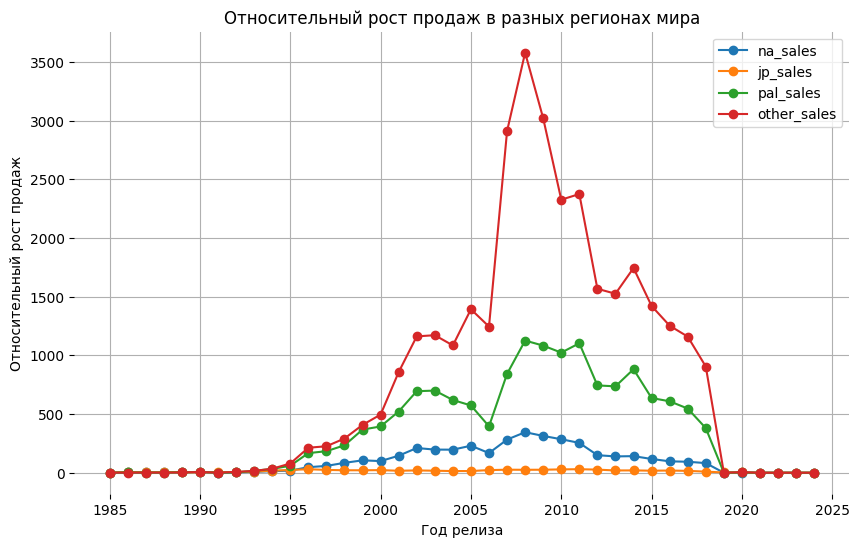

In [ ]:
sales_by_year = games_sales[(games_sales['release_date'].dt.year >= 1985)].groupby('release_year')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Рассчитываем относительный рост продаж в каждом регионе относительно первого года
relative_growth = sales_by_year.div(sales_by_year.iloc[0])

# Создаем график для сравнения относительного роста продаж в разных регионах мира
plt.figure(figsize=(10, 6))
for region in relative_growth.columns:
    plt.plot(relative_growth.index, relative_growth[region], marker='o', label=region)

# Добавляем заголовок и метки осей
plt.title('Относительный рост продаж в разных регионах мира')
plt.xlabel('Год релиза')
plt.ylabel('Относительный рост продаж')
plt.axis('tight')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(True)
plt.show()

## Задание 4.

Найдите топ 20 самых популярных платформ (по глобальным продажам игр).

Для этих 20 платформ создайте поле (`plt.subplots()`) где каждая визуализация будет представлять собой средние продажи игр, изданные в определенном году для конкретной платформы.

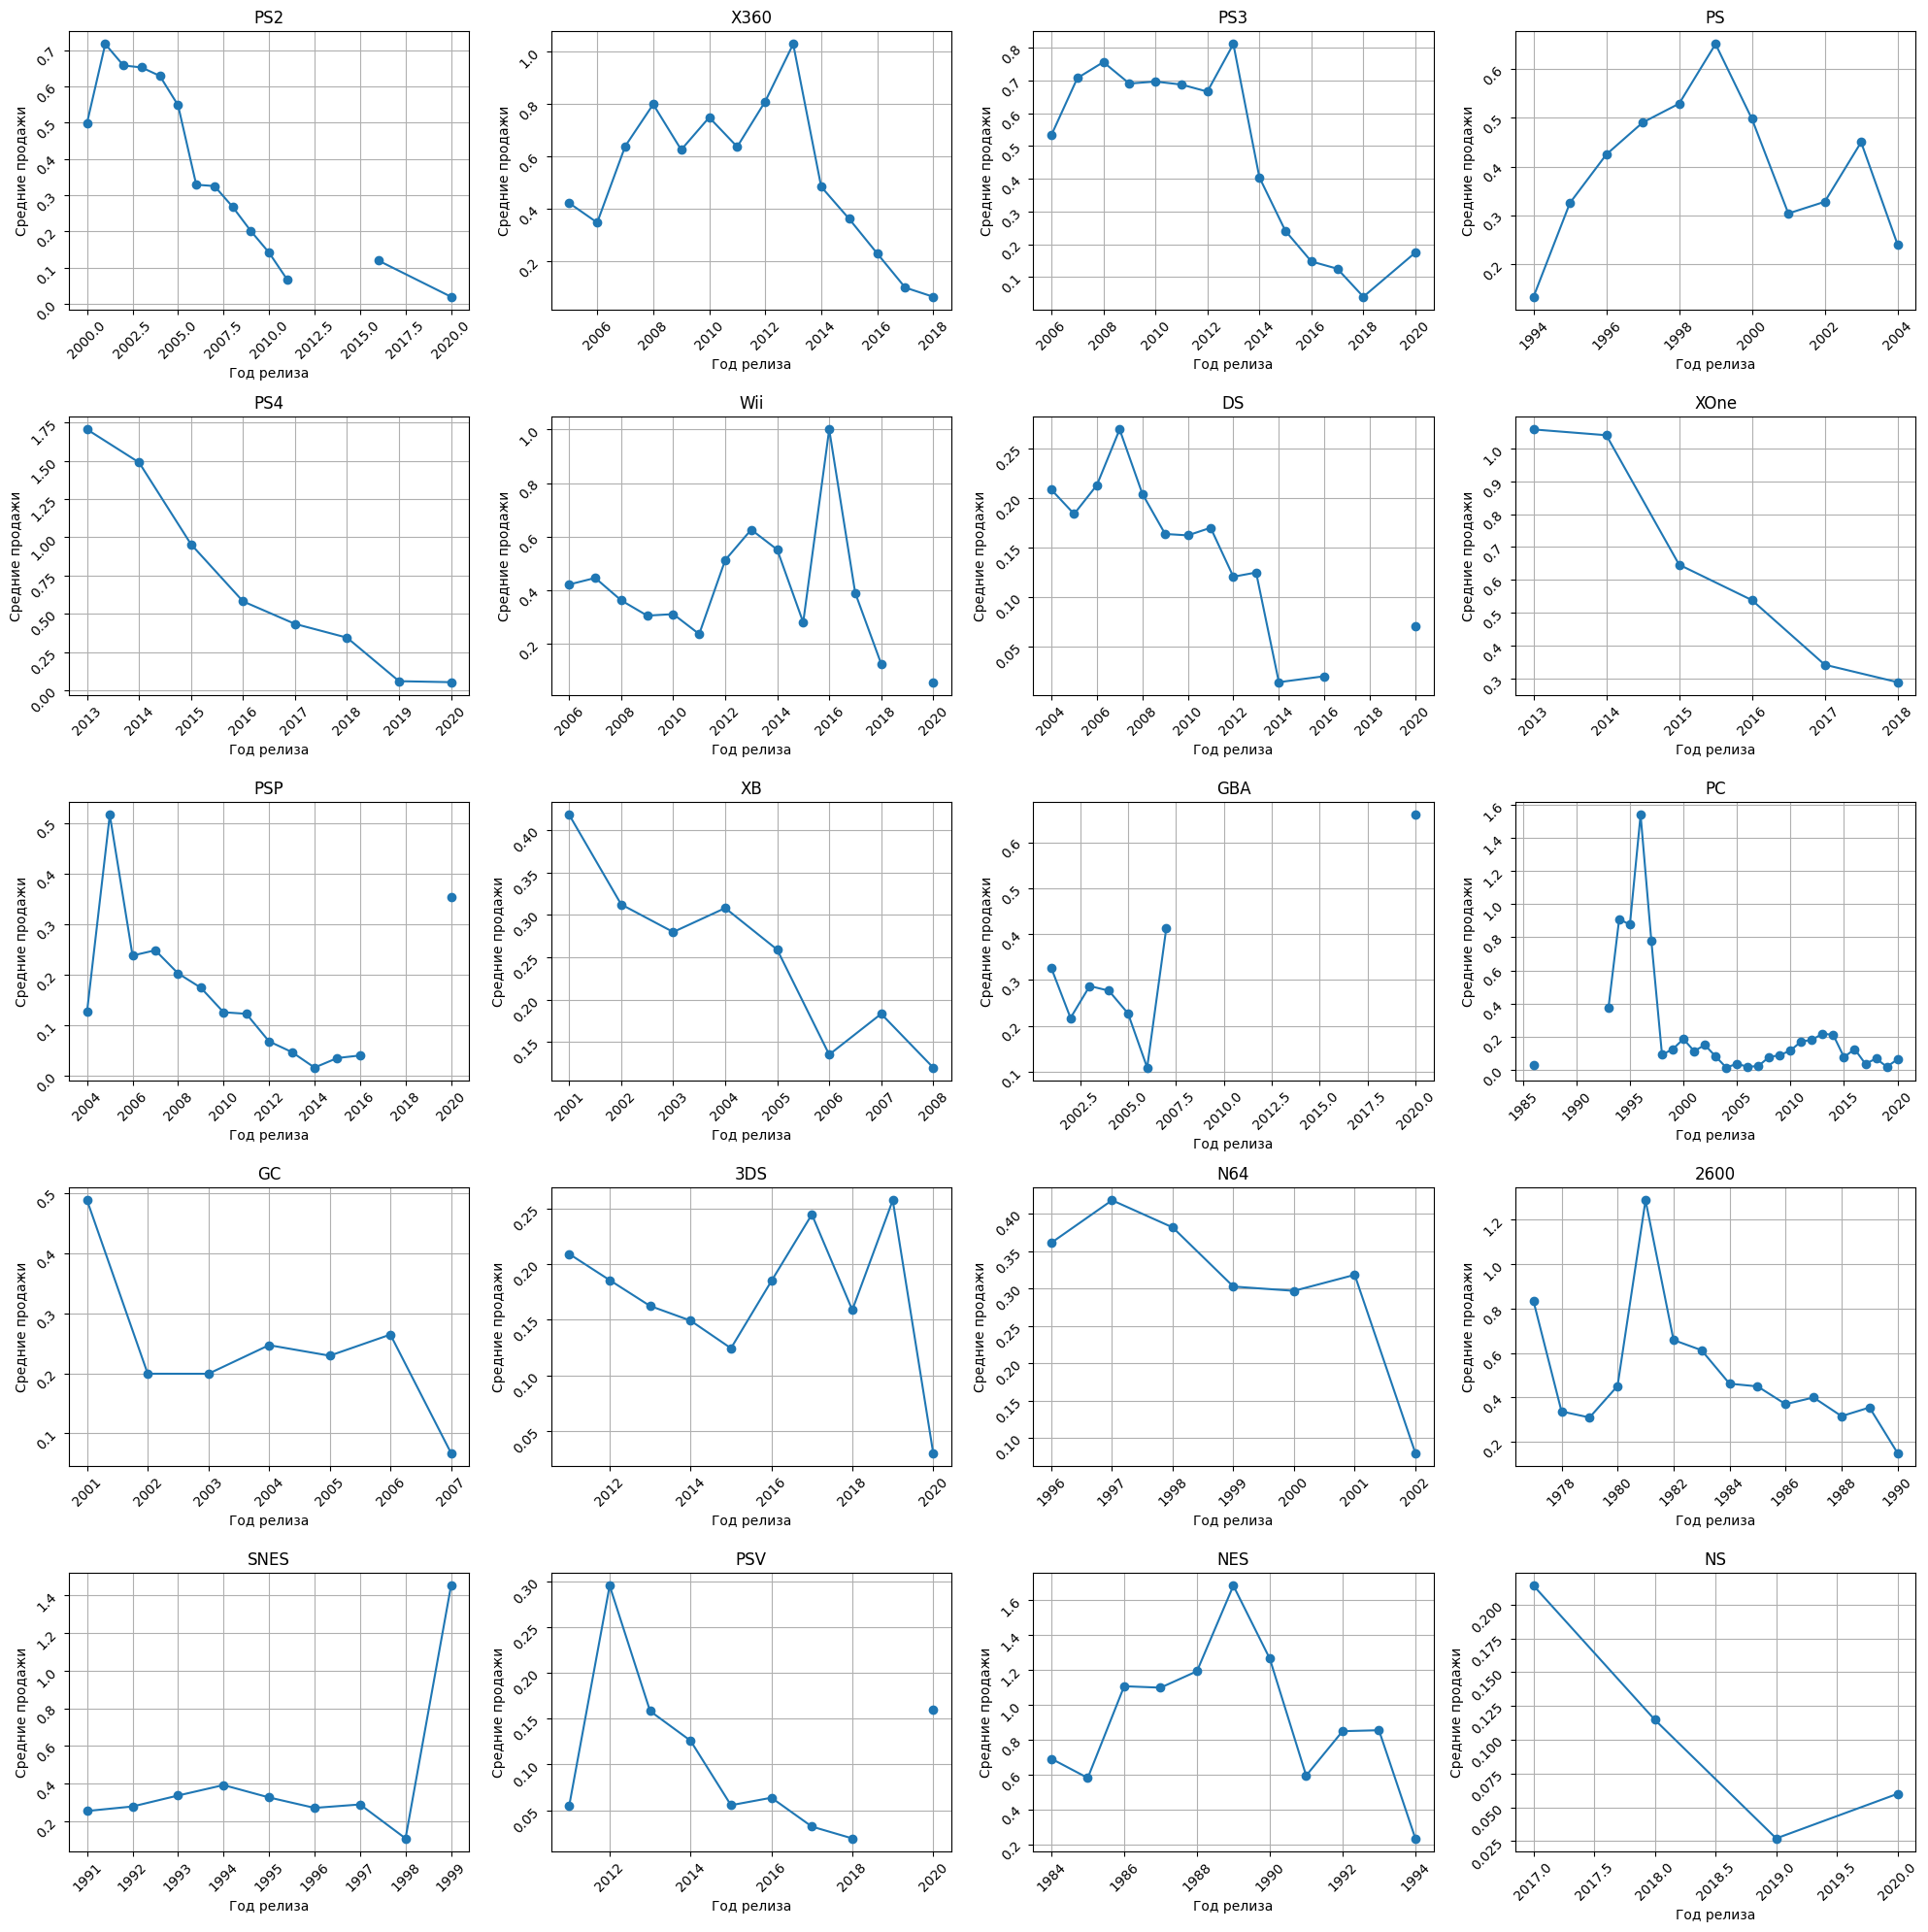

In [ ]:
platform_sales = games_sales.groupby('console')['total_sales'].sum()

# Сортируем по убыванию и выбираем топ 20
top_platforms = platform_sales.sort_values(ascending=False).head(20)

# Создаем поле для графиков
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# Итерируемся по топ 20 платформам и строим графики
for idx, platform in enumerate(top_platforms.index):
    row = idx // 4
    col = idx % 4
    platform_data = games_sales[games_sales['console'] == platform].groupby(games_sales['release_date'].dt.year)['total_sales'].mean()
    axs[row, col].plot(platform_data.index, platform_data.values, marker='o', linestyle='-')
    axs[row, col].set_title(platform)
    axs[row, col].set_xlabel('Год релиза')
    axs[row, col].set_ylabel('Средние продажи')
    axs[row, col].tick_params(labelrotation=45)
    axs[row, col].grid(True)

# Добавляем расстояние между графиками
plt.tight_layout()

# Показываем графики
plt.show()

## Bonus: создание интерактивных `Plotly` визуализаций - создание кнопок и списков

In [ ]:
top_publishers

Index(['Sega', 'Ubisoft', 'Electronic Arts', 'Activision', 'Konami'], dtype='object')

In [ ]:
# Находим 5 самых популярных издателей
top_publishers = games_sales['publisher'].value_counts().head(6)[1:].index

# Создаем подграфики для каждого издателя
fig = go.Figure()

for i, publisher in enumerate(top_publishers):
    if i == 0:
        visible = True
    else:
        visible = False
    sales_by_year = games_sales[games_sales['publisher'] == publisher].groupby(games_sales['release_date'].dt.year)['total_sales'].sum()
    fig.add_trace(go.Scatter(x=sales_by_year.index, y=sales_by_year.values, mode='lines', name=publisher, visible=visible))

# Создаем кнопки для выбора издателя
buttons = []
for i, publisher in enumerate(top_publishers):
    label = publisher
    buttons.append(dict(method='update',
                        label=label,
                        args=[{'visible': [i == j for j in range(len(top_publishers))]},
                              {'title': f'Dynamics of Sales for {label} by Year'}]))

# Настраиваем оформление и размещение кнопок
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.1,
        y=0.5
    )]
)

# Устанавливаем заголовок и метки осей
fig.update_layout(title='Dynamics of Sales by Publisher by Year', xaxis_title='Year', yaxis_title='Total Sales')

fig.show()

In [ ]:
periods = ['Весь период', '1995-2005', '2005-2010', '2010-2020']

# Добавляем еще один updatemenus в fig.update_layout
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.1,
        y=0.5
    ),
    dict(
        active=0,
        buttons=[dict(method='relayout',
                      label=period,
                      args=[{'xaxis.range': [1995, 2020] if period == 'Весь период' else [int(x) for x in period.split('-')]}]) for period in periods],
        x=1.1,
        y=0.4
    )]
)

# Устанавливаем direction и pad для updatemenus
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons,
        x=1.1,
        y=0.5,
        direction='down',
        pad={'r': 10, 't': 10}
    ),
    dict(
        active=0,
        buttons=[dict(method='relayout',
                      label=period,
                      args=[{'xaxis.range': [1995, 2020] if period == 'Весь период' else [int(x) for x in period.split('-')]}]) for period in periods],
        x=1.1,
        y=0.4,
        direction='down',
        pad={'r': 10, 't': 10}
    )]
)

# Остальной код не меняется
fig.update_layout(title='Dynamics of Sales by Publisher by Year', xaxis_title='Year', yaxis_title='Total Sales')

fig.show()

## Задание 5.

Существует ли зависимость между оценкой критиков и продажами игр?

Выделите 12 наиболее популярных платформ. Для каждой платформы создайте `scatter plot` (диаграмму рассеяния) зависимости между глобальными продажами и оценкой критиков. На каждый график нанесите линию регрессионного уравнения, а также добавьте текст с получившейся формулой регрессии.

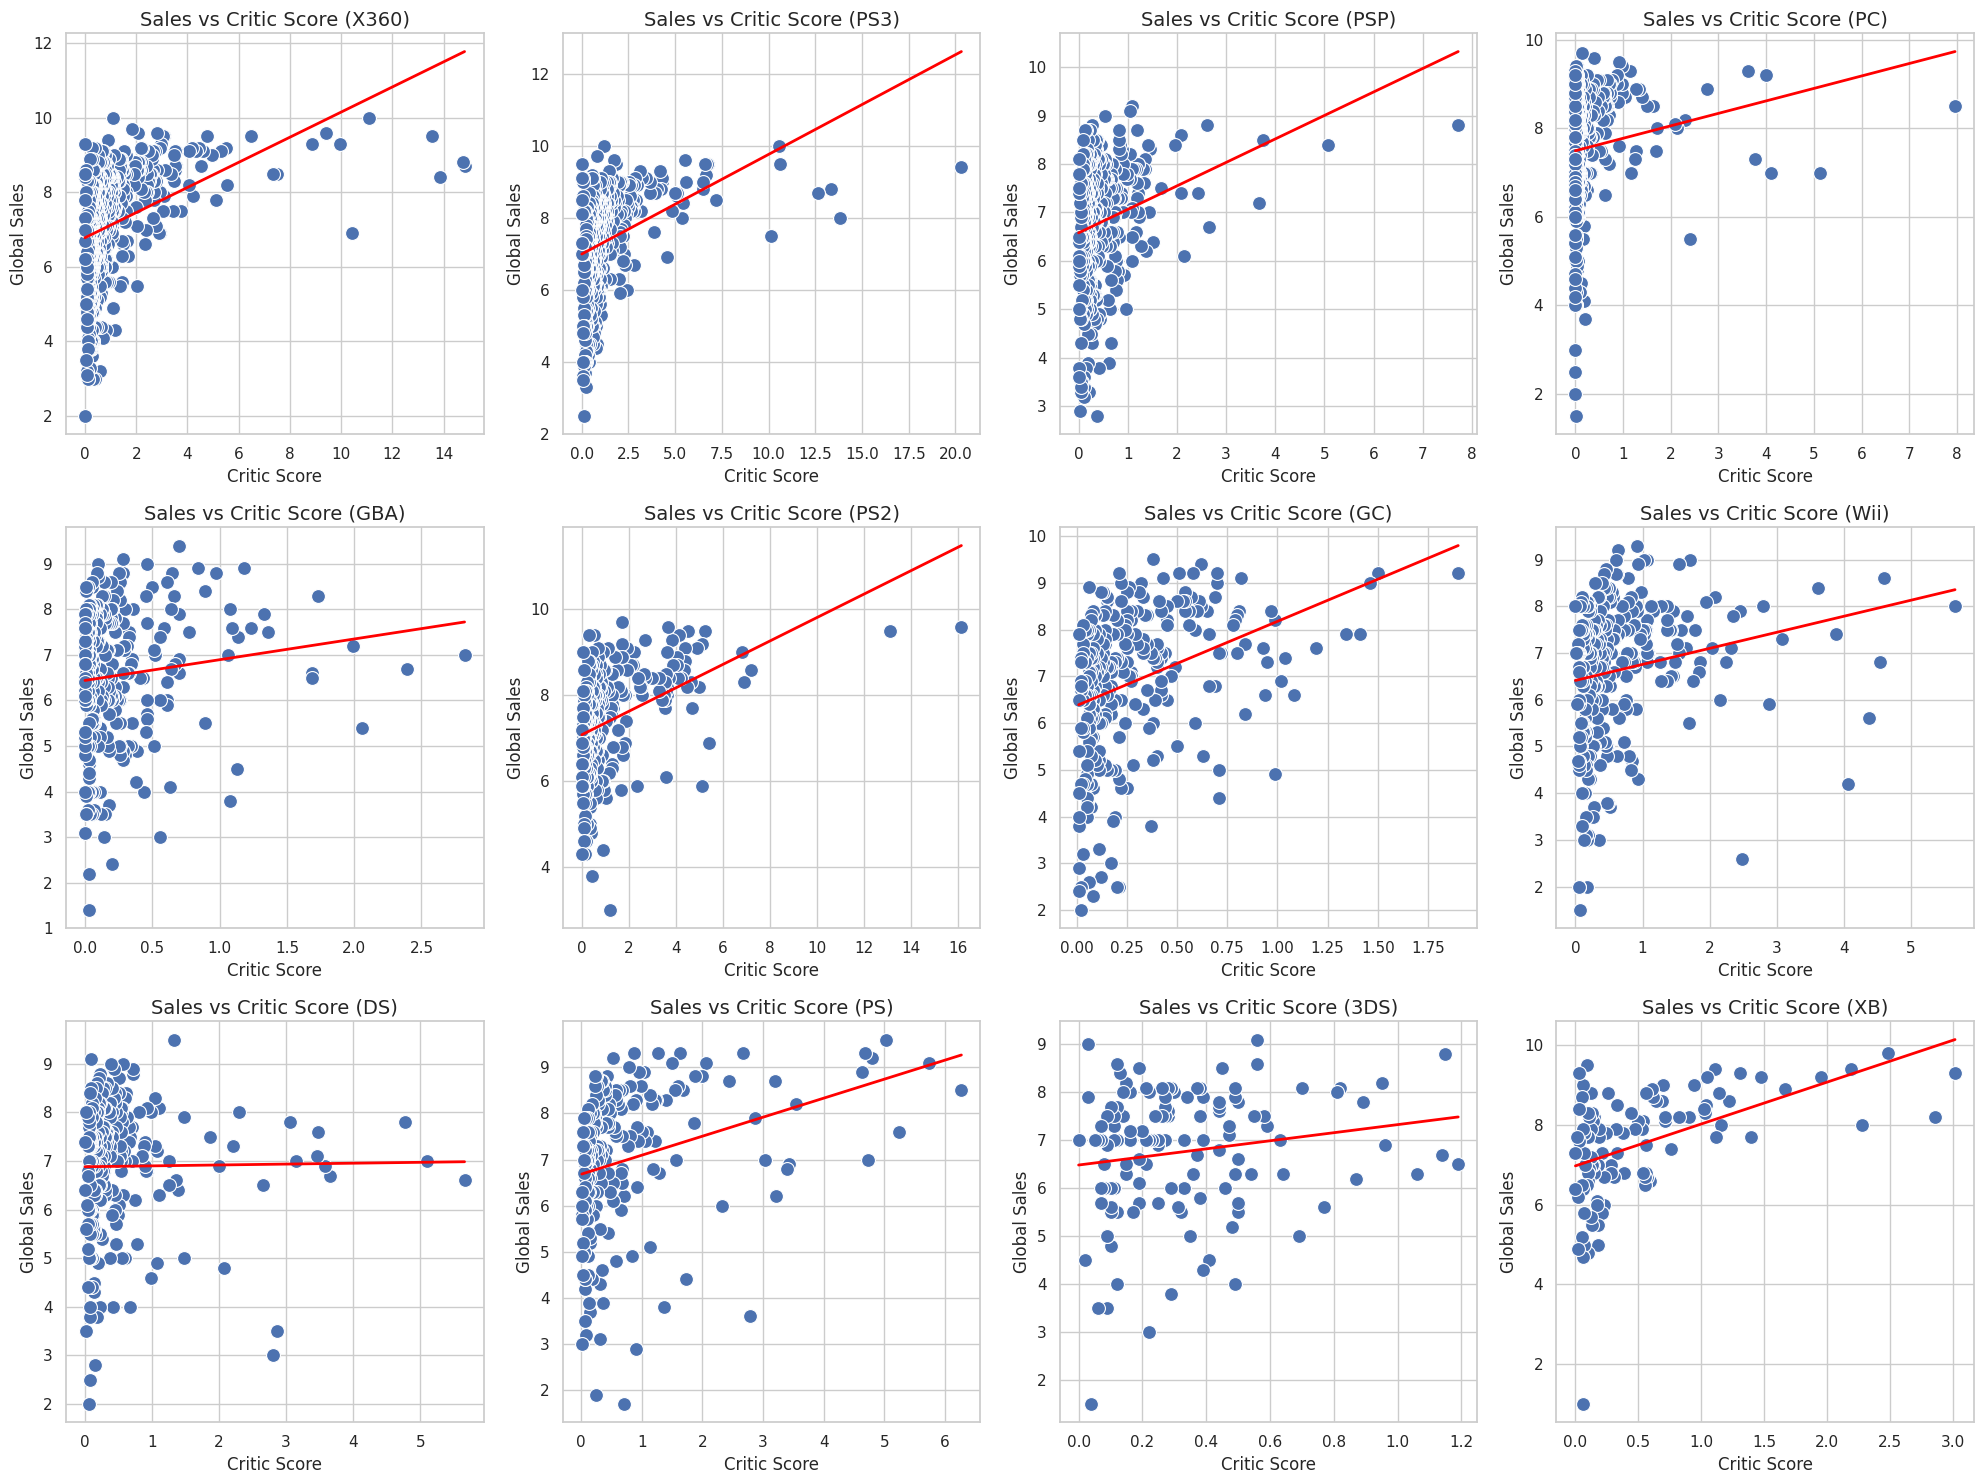

In [ ]:
import statsmodels.api as sm

# Отфильтруем только строки, где у нас есть данные о critic_score и total_sales
games_sales_no_na = games_sales.dropna(subset=['critic_score', 'total_sales'])

# Выберем 12 наиболее популярных платформ
top_platforms = games_sales_no_na['console'].value_counts().head(12).index

# Создаем поле для графиков размером 3 на 4
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Создаем scatter plot для каждой платформы внутри сетки
for idx, platform in enumerate(top_platforms):
    row = idx // 4
    col = idx % 4

    platform_data = games_sales_no_na[games_sales_no_na['console'] == platform]

    # Строим scatter plot без линии регрессии
    sns.set(style="whitegrid")
    sns.scatterplot(x='total_sales', y='critic_score', data=platform_data, ax=axs[row, col], s=100)

    # Выполняем регрессию
    x = sm.add_constant(platform_data['total_sales'])
    y = platform_data['critic_score']
    model = sm.OLS(y, x)
    results = model.fit()

    # Построение линии регрессии
    axs[row, col].plot(platform_data['total_sales'], results.predict(), color='red', linewidth=2)

    # Добавляем заголовок и метки осей
    axs[row, col].set_title(f'Sales vs Critic Score ({platform})', fontsize=14)
    axs[row, col].set_xlabel('Critic Score', fontsize=12)
    axs[row, col].set_ylabel('Global Sales', fontsize=12)

# Убираем лишние пустые поля
for i in range(len(top_platforms), 12):
    row = i // 4
    col = i % 4
    fig.delaxes(axs[row, col])

# Показываем графики
plt.tight_layout()
plt.show()

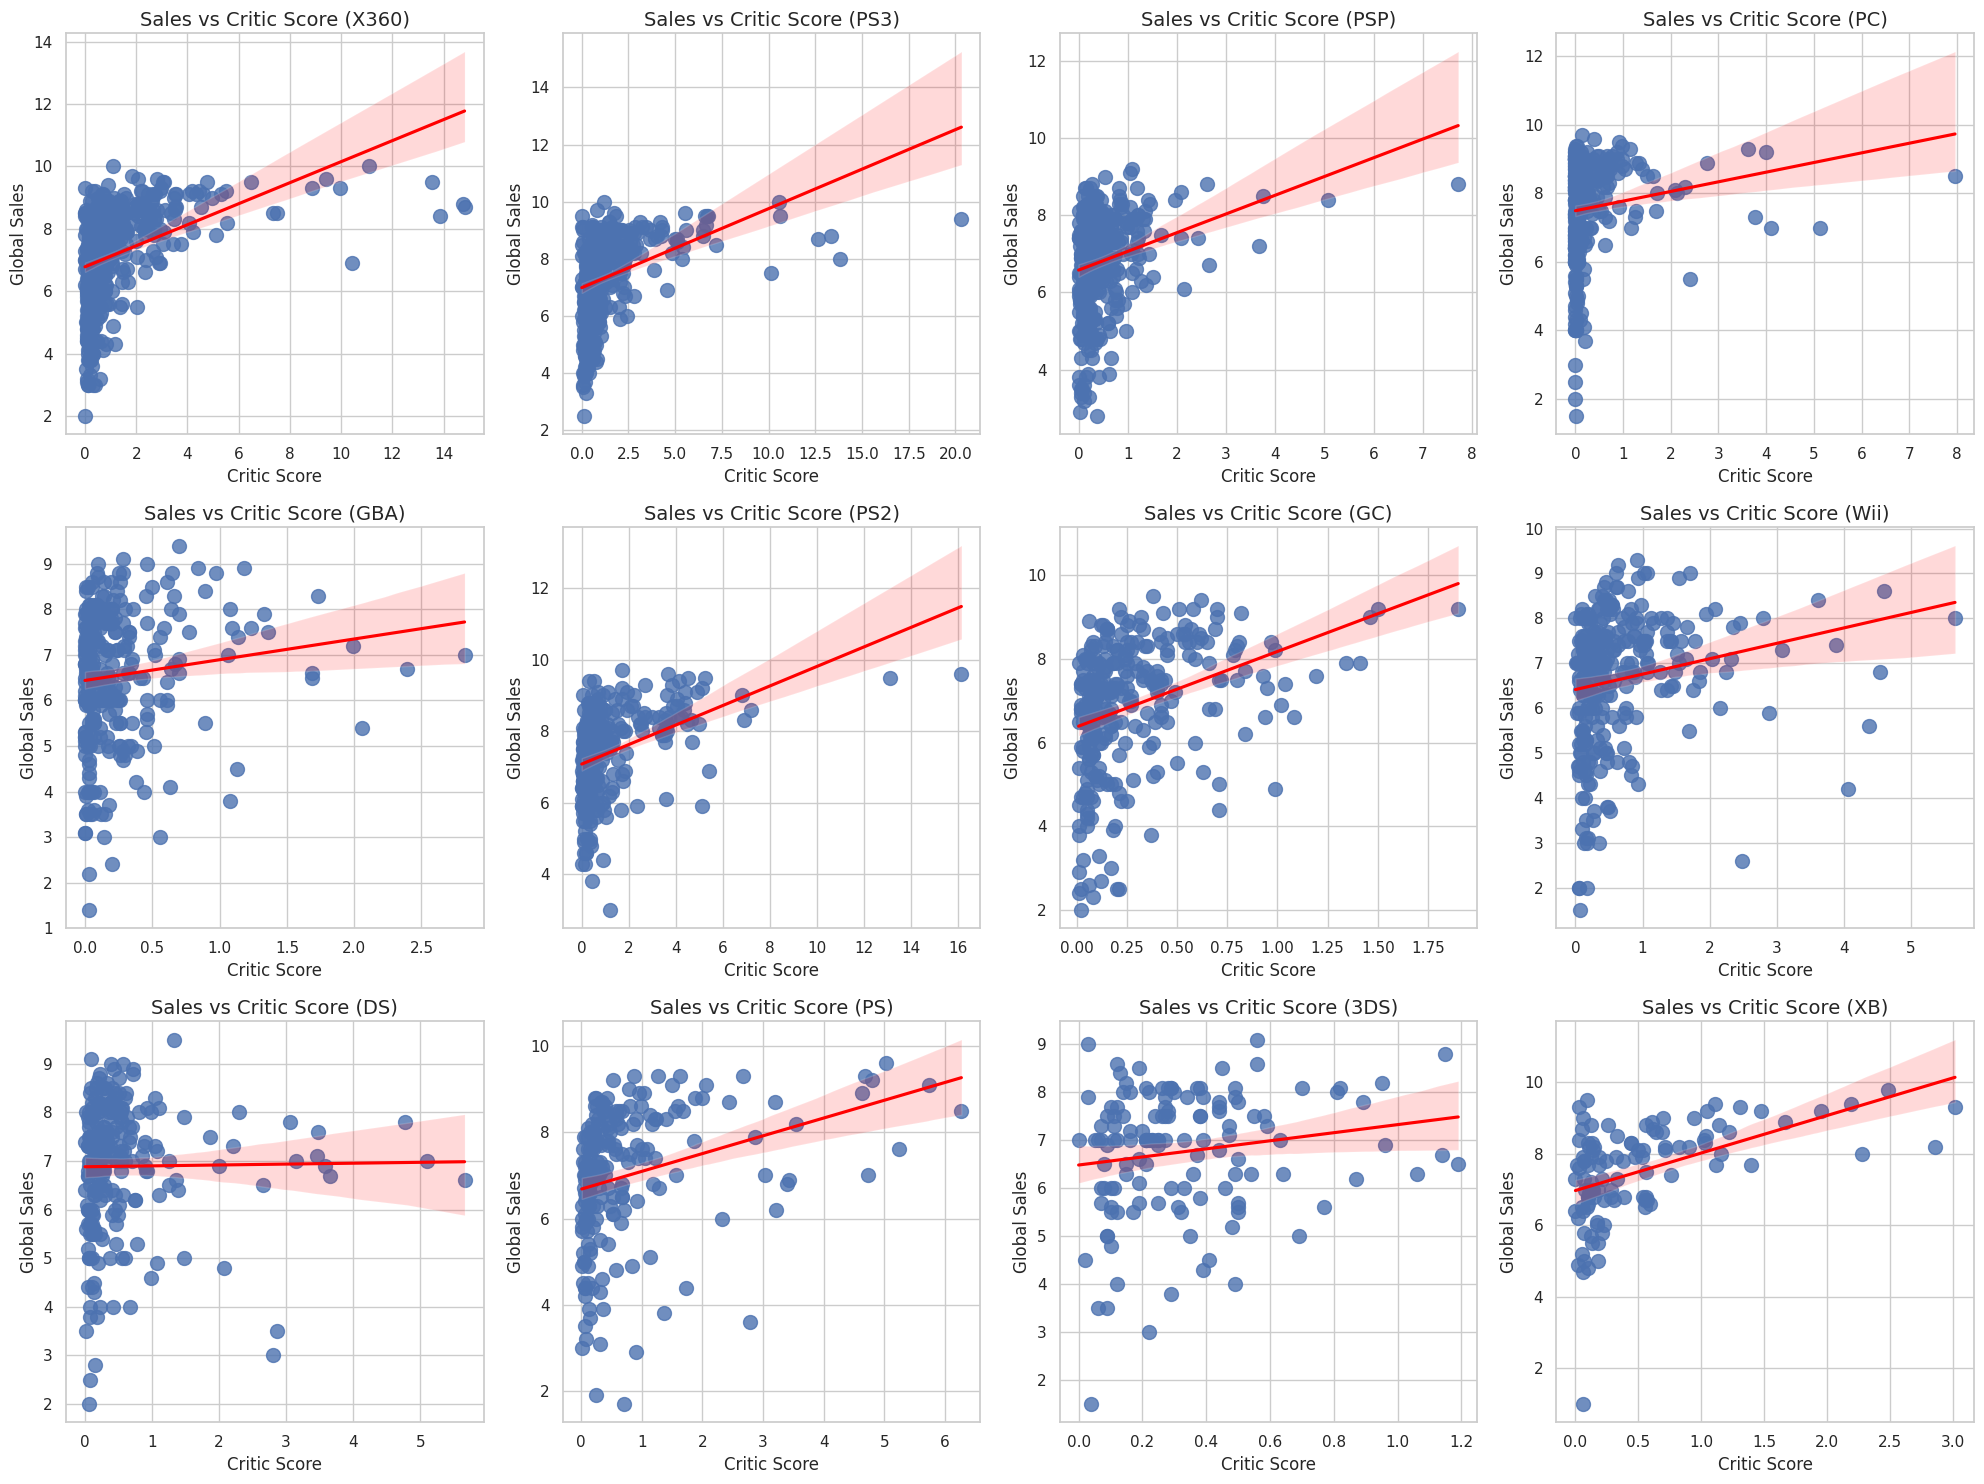

In [ ]:
games_sales_no_na = games_sales.dropna(subset=['critic_score', 'total_sales'])

# Выберем 12 наиболее популярных платформ
top_platforms = games_sales_no_na['console'].value_counts().head(12).index

# Создаем поле для графиков размером 3 на 4
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Создаем scatter plot для каждой платформы внутри сетки
for idx, platform in enumerate(top_platforms):
    row = idx // 4
    col = idx % 4

    platform_data = games_sales_no_na[games_sales_no_na['console'] == platform]

    # Строим scatter plot с линией регрессии
    sns.set(style="whitegrid")
    sns.regplot(x='total_sales', y='critic_score', data=platform_data, ax=axs[row, col], scatter_kws={'s': 100}, line_kws={'color': 'red'})

    # Добавляем заголовок и метки осей
    axs[row, col].set_title(f'Sales vs Critic Score ({platform})', fontsize=14)
    axs[row, col].set_xlabel('Critic Score', fontsize=12)
    axs[row, col].set_ylabel('Global Sales', fontsize=12)

# Убираем лишние пустые поля
for i in range(len(top_platforms), 12):
    row = i // 4
    col = i % 4
    fig.delaxes(axs[row, col])

# Показываем графики
plt.tight_layout()
plt.show()

## Задание 6.

Напишите функцию, которая будет преобразовывать продажи в разных регионах в доли от общих продаж. Примените функцию к датасету и постройте график динамики изменения доли европейского рынка по годам.

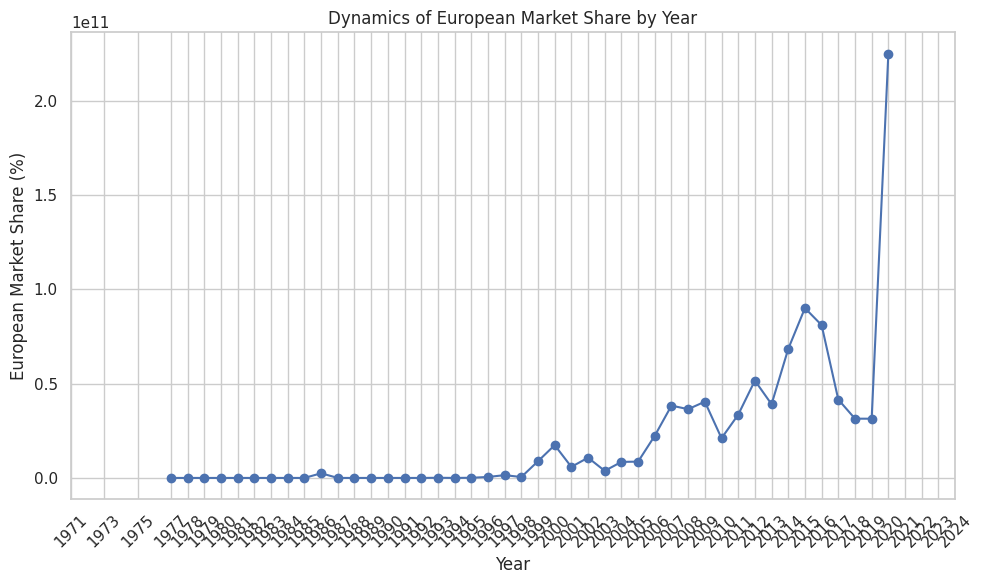

In [ ]:
# Функция для преобразования продаж в доли от общих продаж
def sales_to_percentages(row):
    total_sales = row['total_sales']
    row['na_sales'] = (row['na_sales'] / total_sales) * 100
    row['jp_sales'] = (row['jp_sales'] / total_sales) * 100
    row['pal_sales'] = (row['pal_sales'] / total_sales) * 100
    row['other_sales'] = (row['other_sales'] / total_sales) * 100
    return row

# Применяем функцию к датасету
games_sales[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']] = games_sales[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].div(games_sales['total_sales'], axis=0) * 100

# Преобразуем столбец с датой релиза в формат datetime и извлекаем год
games_sales['release_date'] = pd.to_datetime(games_sales['release_date'])
games_sales['release_year'] = games_sales['release_date'].dt.year

# Группируем данные по году релиза и вычисляем средние доли европейского рынка (pal_sales)
european_market_share = games_sales.groupby('release_year')['pal_sales'].mean()

# Строим график динамики изменения доли европейского рынка по годам
plt.figure(figsize=(10, 6))
plt.plot(european_market_share.index, european_market_share.values, marker='o', color='b', linestyle='-')
plt.title('Dynamics of European Market Share by Year')
plt.xlabel('Year')
plt.ylabel('European Market Share (%)')
plt.grid(True)
plt.xticks(european_market_share.index, rotation=45)
plt.tight_layout()
plt.show()

Что-то пошло не так с 2021 годом. Нужно смотреть данные и разбираться в том, что произошло.

## Задание 7

Как сильно игры с рейтингом выше 8 отличаются от всех остальных?

Введите дамми-переменную для значений рейтинга выше 8 (если рейтинг выше восьми то 1, иначе 0).

Постройте визуализацию отличия распределения этих категорий игр в разные пятилетки.

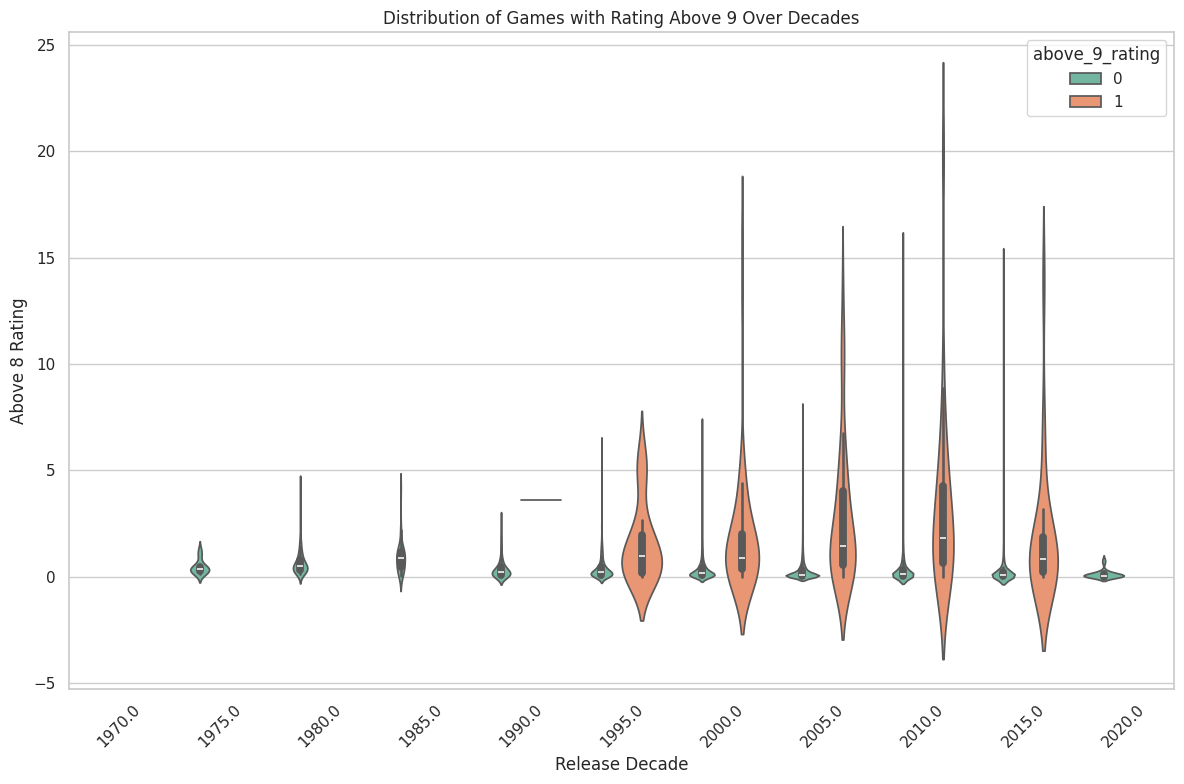

In [ ]:
# Создаем дамми-переменную для рейтинга выше 8
games_sales['above_9_rating'] = games_sales['critic_score'] > 9
games_sales['above_9_rating'] = games_sales['above_9_rating'].astype(int)

# Преобразуем столбец с датой релиза в формат datetime и извлекаем год
games_sales['release_date'] = pd.to_datetime(games_sales['release_date'])
games_sales['release_year'] = games_sales['release_date'].dt.year

# Разделяем данные по пятилетним интервалам
games_sales['release_decade'] = (games_sales['release_year'] // 5) * 5

# Строим визуализацию
plt.figure(figsize=(12, 8))
sns.violinplot(x='release_decade', y='total_sales', data=games_sales, palette='Set2', hue='above_9_rating')
plt.title('Distribution of Games with Rating Above 9 Over Decades')
plt.xlabel('Release Decade')
plt.ylabel('Above 8 Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

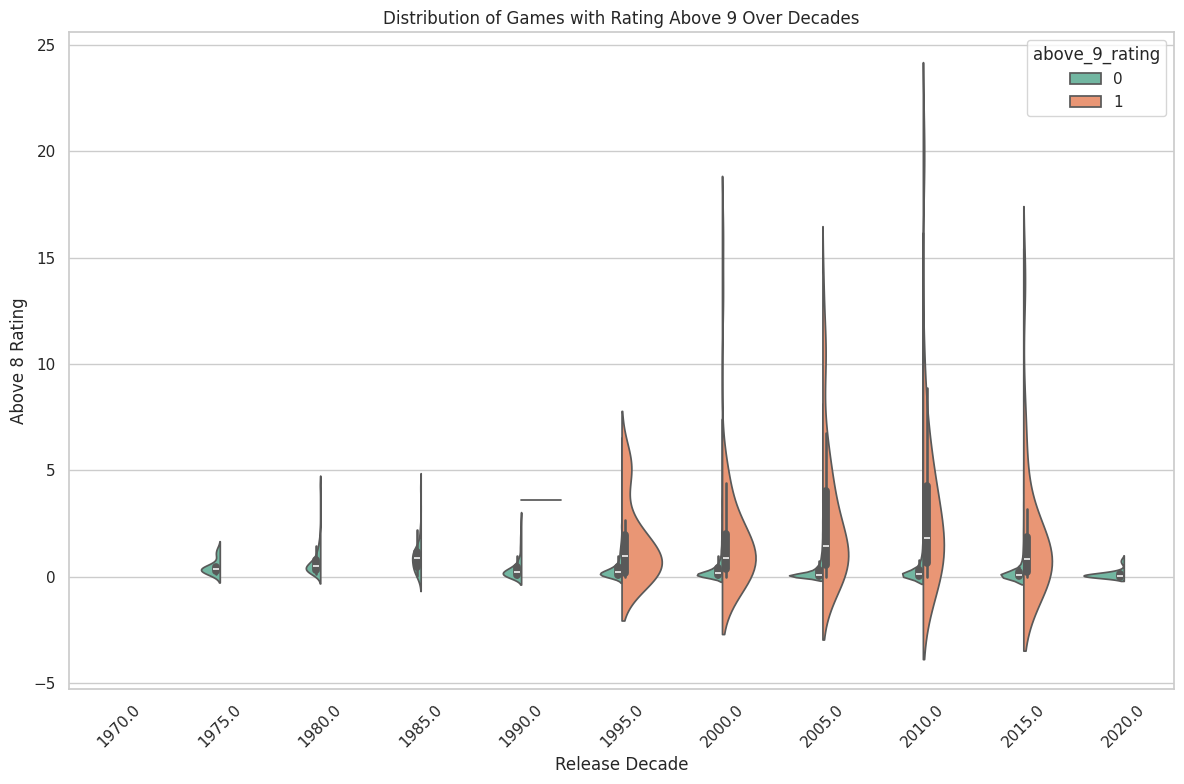

In [ ]:
# Строим визуализацию
plt.figure(figsize=(12, 8))
sns.violinplot(x='release_decade', y='total_sales', data=games_sales, palette='Set2', hue='above_9_rating', split=True)
plt.title('Distribution of Games with Rating Above 9 Over Decades')
plt.xlabel('Release Decade')
plt.ylabel('Above 8 Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()